This is traial 1. Here a sigle cnn layer and a single dense layer have been used.  Data was processed by normalization in tensorflow.kears.utils.

In [1]:
'''
This is trial 1
It uses single cnn layer one Max Pool  and singe dense layer
'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import tensorflow.keras.backend as K


(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)


cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nThe is the model plot: \n")
tf.keras.utils.plot_model(cnn, to_file='./trial1.png', show_shapes=True)
print("\n")
print("\nThe is the history for 15 epochs: \n")
cnn.fit(x_train, y_train, epochs=15)
print("\n")
print("\nThis is the evaluation.")
cnn.evaluate(x_test,y_test)


The is the model plot: 




The is the history for 15 epochs: 

Epoch 1/15
1563/1563 [==============================] - 13s 5ms/step - loss: 1.9134 - accuracy: 0.3066
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7235 - accuracy: 0.3876
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6528 - accuracy: 0.4181
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6058 - accuracy: 0.4366
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5656 - accuracy: 0.4510
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5335 - accuracy: 0.4669
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5038 - accuracy: 0.4778
Epoch 8/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4756 - accuracy: 0.4887
Epoch 9/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4497 - accuracy: 0.4971
Epoch 10/15
1563

[1.4008585214614868, 0.5070000290870667]

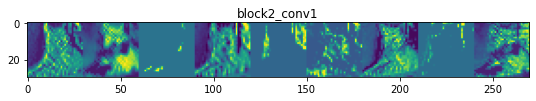

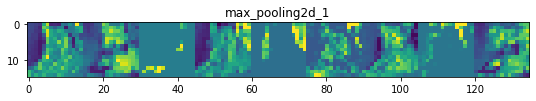

In [2]:
layer_names = ['block2_conv1','max_pooling2d_1']
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def generate_pattern(layer_name, filter_index, size=150):

    layer_output = cnn.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(32, 32))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    #plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):
    
    images_per_row = 9
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        #n_cols = n_features // images_per_row
        n_cols = 1
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std()+0.01)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    

layers = [layer.output for layer in cnn.layers[:9]]
activations_output = tf.keras.models.Model(inputs=cnn.input, outputs=layers)

img = "./cat.jpg"
activations = get_activations(img,activations_output)


show_activations(activations, layer_names)

This is trail 2. In this trial 2 cnn layers and one dense layer have been used. Data was processed by normalization in tensorflow.kears.utils.


The is the model plot: 




The is the history for 15 epochs: 

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7465 - accuracy: 0.3627
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5045 - accuracy: 0.4647
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4015 - accuracy: 0.5048
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3150 - accuracy: 0.5361
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2381 - accuracy: 0.5626
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1743 - accuracy: 0.5865
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1108 - accuracy: 0.6085
Epoch 8/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0517 - accuracy: 0.6327
Epoch 9/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9976 - accuracy: 0.6495
Epoch 10

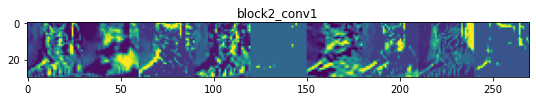

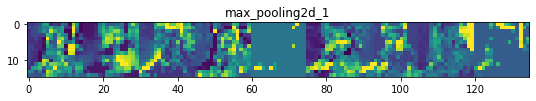

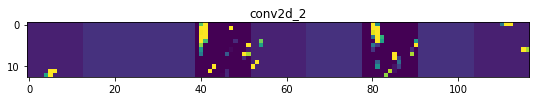

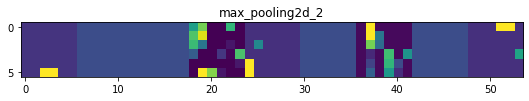

In [3]:
'''
This is trial 2
Using two cnn layer 
'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.backend as K
from keras.preprocessing import image

(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)
#x_train, y_train = shuffle(x_train, y_train)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nThe is the model plot: \n")
tf.keras.utils.plot_model(cnn, to_file='./trial2.png', show_shapes=True)
print("\n")
print("\nThe is the history for 15 epochs: \n")
cnn.fit(x_train, y_train, epochs=15)
print("\n")
print("\nThis is the evaluation.")
cnn.evaluate(x_test,y_test)


layer_names = ['block2_conv1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def generate_pattern(layer_name, filter_index, size=150):

    layer_output = cnn.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(32, 32))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    #plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):
    
    images_per_row = 9
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        #n_cols = n_features // images_per_row
        n_cols = 1
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std()+0.01)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    

layers = [layer.output for layer in cnn.layers[:9]]
activations_output = tf.keras.models.Model(inputs=cnn.input, outputs=layers)

img = "./cat.jpg"
activations = get_activations(img,activations_output)


show_activations(activations, layer_names)

This is trail 3. In this trial 2 cnn layers and one dense layer have been used. Data was processed by dividing with 255. Ther filters in cnn also has increased from last trial. Also there is a validation set data last 10% and batch size of 10


The is the model plot: 




The is the history for 15 epochs: 

Epoch 1/15
4500/4500 - 24s - loss: 1.4166 - accuracy: 0.4917 - val_loss: 1.0932 - val_accuracy: 0.6204
Epoch 2/15
4500/4500 - 23s - loss: 1.0526 - accuracy: 0.6332 - val_loss: 1.0499 - val_accuracy: 0.6354
Epoch 3/15
4500/4500 - 23s - loss: 0.8915 - accuracy: 0.6896 - val_loss: 0.9173 - val_accuracy: 0.6830
Epoch 4/15
4500/4500 - 23s - loss: 0.7840 - accuracy: 0.7256 - val_loss: 0.8797 - val_accuracy: 0.7014
Epoch 5/15
4500/4500 - 24s - loss: 0.6952 - accuracy: 0.7582 - val_loss: 0.8691 - val_accuracy: 0.6992
Epoch 6/15
4500/4500 - 24s - loss: 0.6106 - accuracy: 0.7850 - val_loss: 0.9079 - val_accuracy: 0.7144
Epoch 7/15
4500/4500 - 24s - loss: 0.5446 - accuracy: 0.8078 - val_loss: 0.9993 - val_accuracy: 0.6856
Epoch 8/15
4500/4500 - 23s - loss: 0.4767 - accuracy: 0.8324 - val_loss: 1.0223 - val_accuracy: 0.6946
Epoch 9/15
4500/4500 - 23s - loss: 0.4154 - accuracy: 0.8519 - val_loss: 1.0751 - val_accuracy: 0.6978
Epoch 10

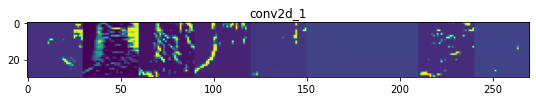

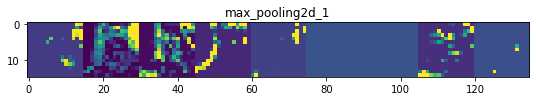

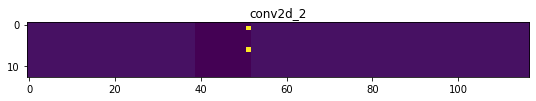

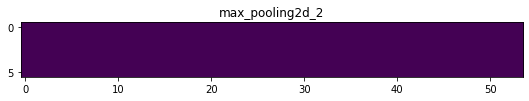

In [4]:
#This is 2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.backend as K
from keras.preprocessing import image

(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
x_train = x_train / 255.0
x_test = x_test / 255.0


cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nThe is the model plot: \n")
tf.keras.utils.plot_model(cnn, to_file='./trial3.png', show_shapes=True)
print("\n")
print("\nThe is the history for 15 epochs: \n")
cnn.fit(x_train, y_train, validation_split=0.1,
       batch_size=10, verbose=2, epochs=15)
print("\n")
print("\nThis is the evaluation.\n")
cnn.evaluate(x_test,y_test)

layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def generate_pattern(layer_name, filter_index, size=150):

    layer_output = cnn.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(32, 32))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    #plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):
    
    images_per_row = 9
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        #n_cols = n_features // images_per_row
        n_cols = 1
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std()+0.01)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    

layers = [layer.output for layer in cnn.layers[:9]]
activations_output = tf.keras.models.Model(inputs=cnn.input, outputs=layers)

img = "./cat.jpg"
activations = get_activations(img,activations_output)


show_activations(activations, layer_names)

This is trail 4. In this trial 2 cnn layers and one dense layer have been used. Data was processed by dividing with 255. There is a validation set data last 10% and batch size of 5. Learning rate has changed and dropout has been introduced.


The is the model plot: 




The is the history for 15 epochs: 

Epoch 1/15
9000/9000 - 47s - loss: 1.6231 - accuracy: 0.4082 - val_loss: 1.3279 - val_accuracy: 0.5326
Epoch 2/15
9000/9000 - 47s - loss: 1.2984 - accuracy: 0.5391 - val_loss: 1.1303 - val_accuracy: 0.6092
Epoch 3/15
9000/9000 - 46s - loss: 1.1515 - accuracy: 0.5965 - val_loss: 1.0278 - val_accuracy: 0.6484
Epoch 4/15
9000/9000 - 46s - loss: 1.0571 - accuracy: 0.6300 - val_loss: 0.9803 - val_accuracy: 0.6562
Epoch 5/15
9000/9000 - 47s - loss: 0.9812 - accuracy: 0.6571 - val_loss: 0.9588 - val_accuracy: 0.6660
Epoch 6/15
9000/9000 - 47s - loss: 0.9176 - accuracy: 0.6816 - val_loss: 0.8814 - val_accuracy: 0.6934
Epoch 7/15
9000/9000 - 47s - loss: 0.8676 - accuracy: 0.6973 - val_loss: 0.8442 - val_accuracy: 0.7080
Epoch 8/15
9000/9000 - 46s - loss: 0.8237 - accuracy: 0.7116 - val_loss: 0.8288 - val_accuracy: 0.7096
Epoch 9/15
9000/9000 - 47s - loss: 0.7815 - accuracy: 0.7275 - val_loss: 0.7936 - val_accuracy: 0.7324
Epoch 10

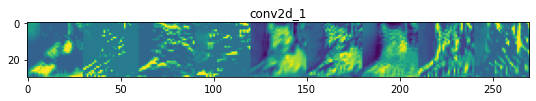

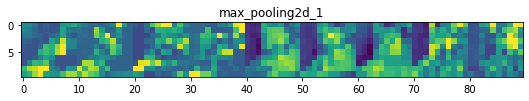

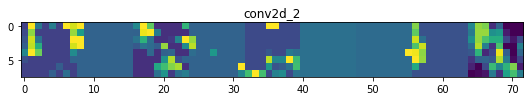

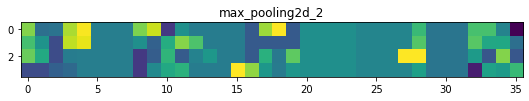

In [5]:
#This is 2.2 (best sofar don't touch)
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.backend as K
from keras.preprocessing import image

(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
x_train = x_train / 255.0
x_test = x_test / 255.0


cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nThe is the model plot: \n")
tf.keras.utils.plot_model(cnn, to_file='./trial4.png', show_shapes=True)
print("\n")
print("\nThe is the history for 15 epochs: \n")
cnn.fit(x_train, y_train, validation_split=0.1,
       batch_size=5, verbose=2, epochs=15)

print("\n")
print("\nThis is the evaluation.\n")
cnn.evaluate(x_test,y_test)


layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def generate_pattern(layer_name, filter_index, size=150):

    layer_output = cnn.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(32, 32))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    #plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):
    
    images_per_row = 9
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        #n_cols = n_features // images_per_row
        n_cols = 1
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std()+0.01)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    

layers = [layer.output for layer in cnn.layers[:9]]
activations_output = tf.keras.models.Model(inputs=cnn.input, outputs=layers)

img = "./cat.jpg"
activations = get_activations(img,activations_output)


show_activations(activations, layer_names)

This is trail 5. In this trial 5 cnn layers, 3 maxpooling and two dense layer have been used. Data was processed by dividing with 255. There is a validation set data last 10% and batch size of 5. Learning rate same as last trial and two dropout has been introduced.


The is the model plot: 




The is the history for 15 epochs: 

Epoch 1/15
9000/9000 - 77s - loss: 1.5120 - accuracy: 0.4354 - val_loss: 1.1635 - val_accuracy: 0.5874
Epoch 2/15
9000/9000 - 75s - loss: 1.0274 - accuracy: 0.6344 - val_loss: 0.8794 - val_accuracy: 0.6898
Epoch 3/15
9000/9000 - 75s - loss: 0.8151 - accuracy: 0.7155 - val_loss: 0.8211 - val_accuracy: 0.7248
Epoch 4/15
9000/9000 - 75s - loss: 0.6683 - accuracy: 0.7679 - val_loss: 0.6944 - val_accuracy: 0.7650
Epoch 5/15
9000/9000 - 75s - loss: 0.5421 - accuracy: 0.8145 - val_loss: 0.6556 - val_accuracy: 0.7844
Epoch 6/15
9000/9000 - 75s - loss: 0.4366 - accuracy: 0.8504 - val_loss: 0.6448 - val_accuracy: 0.7920
Epoch 7/15
9000/9000 - 76s - loss: 0.3392 - accuracy: 0.8845 - val_loss: 0.7103 - val_accuracy: 0.7732
Epoch 8/15
9000/9000 - 76s - loss: 0.2572 - accuracy: 0.9131 - val_loss: 0.6953 - val_accuracy: 0.8042
Epoch 9/15
9000/9000 - 76s - loss: 0.1922 - accuracy: 0.9343 - val_loss: 0.7329 - val_accuracy: 0.7956
Epoch 10

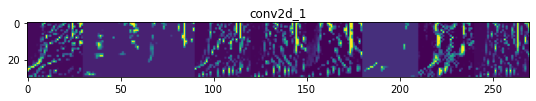

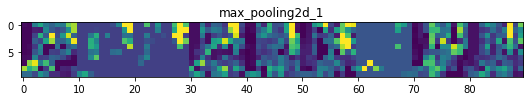

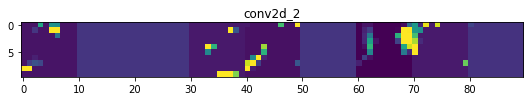

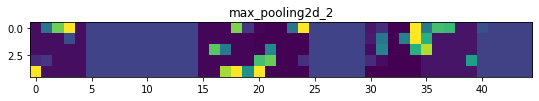

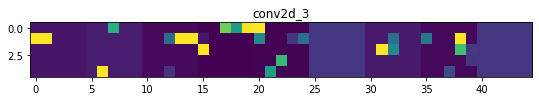

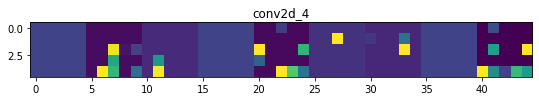

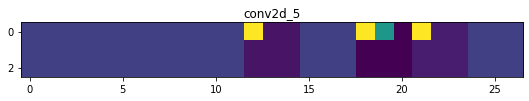

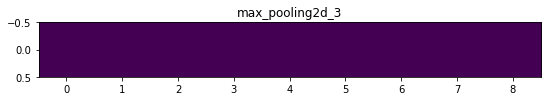

In [3]:
#This is 6.2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.backend as K
from keras.preprocessing import image

(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
x_train = x_train / 255.0
x_test = x_test / 255.0


cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),

    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPooling2D((3, 3)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nThe is the model plot: \n")
tf.keras.utils.plot_model(cnn, to_file='./trial5.png', show_shapes=True)
print("\n")
print("\nThe is the history for 15 epochs: \n")

cnn.fit(x_train, y_train, validation_split=0.1,
       batch_size=5, verbose=2, epochs=15)
print("\n")
print("\nThis is the evaluation.\n")
cnn.evaluate(x_test,y_test)


layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'conv2d_4', 'conv2d_5', 'max_pooling2d_3']
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def generate_pattern(layer_name, filter_index, size=150):

    layer_output = cnn.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(32, 32))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255. 
    #plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):
    
    images_per_row = 9
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        #n_cols = n_features // images_per_row
        n_cols = 1
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std()+0.01)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    

layers = [layer.output for layer in cnn.layers[:9]]
activations_output = tf.keras.models.Model(inputs=cnn.input, outputs=layers)

img = "./cat.jpg"
activations = get_activations(img,activations_output)


show_activations(activations, layer_names)
